In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Loan Dataset

In [164]:
#Read the dataset 
loanData = pd.read_csv("loan.csv",low_memory=False)

# DtypeWarning: One of the column have mixed types.Hence set low_memory=False.

# Inspecting Data

loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [165]:
# Summary of a DataFrame.
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [176]:
# Find the column names with all null values , so that we can discrad them off for analysis
loanData.columns[loanData.isnull().all()].tolist() 

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

 ### 2 -Data Handling and Cleaning

#### Data Quality Issues 
 - Column 47 seems to be containing data of multiple dtype
 - At least 24 columns , seems to be of object type.
 - Multiple columns seems to have all null values.


#### Treating Missing Values

In [52]:
#Droping columns with all null values
loanData.dropna(axis=1,how='all',inplace=True)

In [17]:
#Check again the rows with values which are less represented 
loanData.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

- The column 'desc' contains lots of null values and seems not useful as we already have separate column 'Purpose'. Similarly  'title' is also not useful 
- The column 'funded_amnt_inv' is duplicate 


In [53]:
#Droping columns with majorly null values.
loanData.drop(columns = ['funded_amnt_inv','desc','title'],inplace=True)
loanData

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,36 months,10.65%,162.87,B,B2,NaN,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,36 months,15.96%,84.33,C,C5,NaN,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,36 months,8.07%,156.84,A,A4,NaN,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,36 months,7.43%,155.38,A,A2,NaN,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


- Employer Title replaces Employer Name for all loans listed after 9/23/2013, Hence we will fill missing values for this column based on this info

In [54]:
loanData=loanData[~( ( loanData.emp_title.isnull() ) & ( loanData.emp_length.isnull() ) )]

In [61]:
loanData['emp_title']=loanData['emp_title'].apply(lambda x: "Unnamed" if pd.isnull(x) else x)

C:\Users\santo\AppData\Local\Temp/ipykernel_24740/2817853355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanData['emp_title']=loanData['emp_title'].apply(lambda x: "Unnamed" if pd.isnull(x) else x)


- Since 'mths_since_last_delinq' and 'delinq_2yrs' are related , we can conclude value 0 for n/a values of   mths_since_last_delinq

In [63]:
loanData['mths_since_last_delinq']=loanData['mths_since_last_delinq'].apply(lambda x: 0 if pd.isnull(x) else x)

C:\Users\santo\AppData\Local\Temp/ipykernel_24740/1633098935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanData['mths_since_last_delinq']=loanData['mths_since_last_delinq'].apply(lambda x: 0 if pd.isnull(x) else x)


In [94]:
#Check again the rows with values which are less represented 
loanData.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                       56
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record        36028
open_acc                    

In [96]:
loanData.last_pymnt_d.value_counts()

May-16    1211
Mar-13    1002
Dec-14     913
May-13     885
Feb-13     848
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [97]:
loanData.next_pymnt_d.value_counts()

Jun-16    1086
Jul-16      13
Name: next_pymnt_d, dtype: int64

In [128]:
#Checking rows where both next_pymnt_d and last_pymnt_d are NA
loanData[['issue_d','last_credit_pull_d','last_pymnt_d','term']][loanData.next_pymnt_d.isna() & loanData.last_pymnt_d.isna()]

,issue_d,last_credit_pull_d,last_pymnt_d,term
26,Dec-11,May-16,NaN,36 months
2724,Nov-11,May-16,NaN,36 months
3613,Nov-11,Apr-12,NaN,60 months
3985,Nov-11,Apr-16,NaN,60 months
4206,Nov-11,May-16,NaN,36 months
...,...,...,...,...
36185,Jul-09,Dec-09,NaN,36 months
36206,Jun-09,May-16,NaN,36 months
36209,Jun-09,Dec-09,NaN,36 months
36937,Apr-09,Jun-09,NaN,36 months


In [ ]:
# We can calculate last_payment_d for null values based on term length

In [122]:
loanData[['last_pymnt_d','next_pymnt_d']][~loanData.next_pymnt_d.isna()].value_counts()

last_pymnt_d  next_pymnt_d
May-16        Jun-16          1039
Apr-16        Jun-16            47
May-16        Jul-16            13
dtype: int64

In [107]:
#checking if There are any duplicate records
loanData.duplicated(['id']).sum()


0

In [123]:
# Describing Data
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38698 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38698 non-null  int64  
 1   member_id                   38698 non-null  int64  
 2   loan_amnt                   38698 non-null  int64  
 3   funded_amnt                 38698 non-null  int64  
 4   term                        38698 non-null  object 
 5   int_rate                    38698 non-null  object 
 6   installment                 38698 non-null  float64
 7   grade                       38698 non-null  object 
 8   sub_grade                   38698 non-null  object 
 9   emp_title                   38698 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              38698 non-null  object 
 12  annual_inc                  38698 non-null  float64
 13  verification_status         386

In [124]:
loanData.term.value_counts()

 36 months    28332
 60 months    10366
Name: term, dtype: int64

In [136]:
# Clean the term column and convert this to float
loanData.term= loanData.term.apply(lambda x: x.split(" ")[1]).astype("float")
loanData.term

0        36.0
1        60.0
2        36.0
3        36.0
4        60.0
         ... 
39712    36.0
39713    36.0
39714    36.0
39715    36.0
39716    36.0
Name: term, Length: 39717, dtype: float64

In [140]:
# Check interest rate type
loanData.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [142]:
# Clean the int_rate column and convert this to float
loanData.int_rate= loanData.int_rate.apply(lambda x: x.replace("%","")).astype("float")
loanData.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [137]:
loanData['last_credit_pull_d'].value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [138]:
loanData[loanData['last_credit_pull_d'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
26025,575712,740467,5000,5000,5000.0,36.0,11.12%,163.98,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39476,186499,186347,1000,1000,875.0,36.0,7.12%,30.94,A,A1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [139]:
loanData[loanData['collections_12_mths_ex_med'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39629,131387,113921,6000,6000,600.0,36.0,10.59%,195.27,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39642,127213,85483,2000,2000,1575.0,36.0,7.12%,61.87,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39650,84918,84914,5000,5000,2025.0,36.0,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39659,121568,121574,4000,4000,1925.0,36.0,9.64%,128.41,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36.0,8.70%,88.65,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39666,119043,119040,15450,15450,600.0,36.0,11.22%,507.46,C,C4,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
39667,118823,118026,2500,2500,675.0,36.0,12.80%,84.00,D,D4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39668,118533,117783,2500,2500,825.0,36.0,9.64%,80.26,B,B4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39669,118523,118519,6500,6500,225.0,36.0,15.01%,225.37,F,F1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39670,117863,117849,8000,8000,2275.0,36.0,9.96%,257.99,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


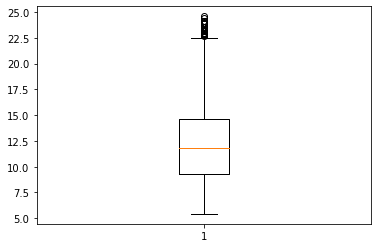

In [144]:
plt.boxplot(loanData.int_rate)
plt.show()

In [149]:
#Checking  outliers
loanData[['loan_status']][loanData.int_rate>23]

,loan_status
223,Fully Paid
540,Current
601,Charged Off
733,Fully Paid
1156,Fully Paid
1199,Current
1619,Fully Paid
1691,Charged Off
1799,Fully Paid
2075,Fully Paid


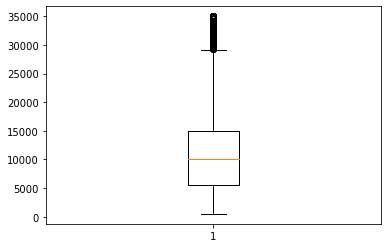

In [150]:
#Checking outliers
plt.boxplot(loanData.loan_amnt)
plt.show()

In [152]:
loanData[loanData.loan_amnt>=31000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
31,1069539,1304608,31825,31825,31825.00000,36.0,7.90,995.82,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
80,1068994,1303432,35000,22075,22050.00000,60.0,17.27,551.84,D,D3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,1068159,1302729,35000,35000,35000.00000,36.0,8.90,1111.37,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
185,1067084,1301459,35000,35000,35000.00000,36.0,10.65,1140.07,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
268,1066155,1277661,35000,26825,26800.00000,60.0,18.64,690.56,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,670409,857058,35000,35000,31845.22117,60.0,18.99,907.73,F,F3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19760,670133,856754,33000,33000,29044.28153,60.0,16.77,816.06,E,E2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19800,669297,855767,32000,32000,31684.89912,60.0,20.85,863.01,G,G3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19811,666337,851924,32000,32000,31569.14450,60.0,19.74,843.19,F,F5,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN


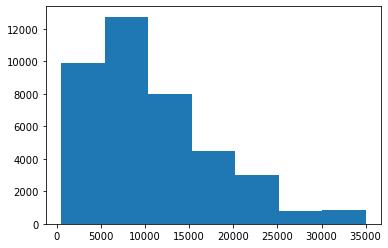

In [158]:
plt.hist(loanData.loan_amnt,bins=7)
plt.show()

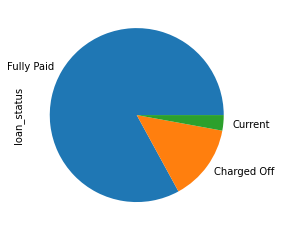

In [161]:
#Plot a pie chart
loanData['loan_status'].value_counts().plot.pie()
plt.show()